<a href="https://colab.research.google.com/github/daniellecd/bootcamp_DataScience_IGTI/blob/master/Trabalho_Pr%C3%A1tico_M%C3%B3dulo_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Módulo I - Trabalho Prático
Nesse trabalho serão avaliados a aplicação e resultados obtidos com o uso do kMeans

In [1]:
#Importação das bibliotecas necessárias

%matplotlib inline
from math import sqrt
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_style("ticks")
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


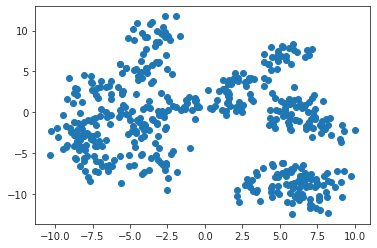

In [2]:
#Criação do dataset

X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [3]:
# Definição do método

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1


In [4]:
#Identificação do número ideal de clusters

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)

print(n)

4


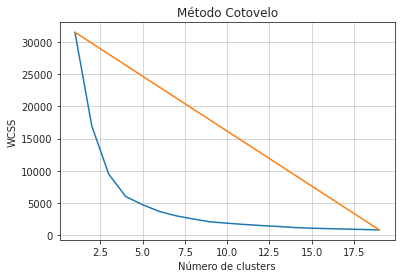

In [5]:
# Visualiação do gráfico do método cotovelo

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Método Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

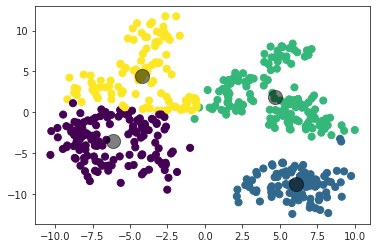

In [6]:
# Visualização dos clusters, considerando o valor ideal

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [7]:
#Posição dos centródides, considerando o número ideal de clusters
kmeans.cluster_centers_ 

array([[-6.10635026, -3.5270784 ],
       [ 6.07279058, -8.8012785 ],
       [ 4.6799272 ,  1.81951975],
       [-4.18061418,  4.39438299]])

In [8]:
#WCSS, considerando o número ideal de clusters
kmeans.inertia_

6005.101775346179

Resultados para 1 CLUSTER

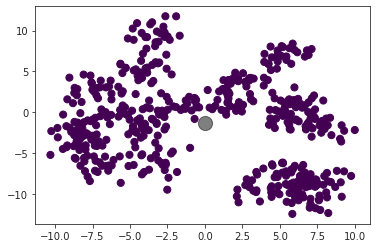

In [9]:
#Execução do algoritmo, considerando apenas 1 cluster
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [10]:
#Posição do centródide, considerando apenas 1 cluster
kmeans.cluster_centers_ 

array([[ 0.02618523, -1.30384304]])

In [11]:
#WCSS, considerando apenas 1 cluster
kmeans.inertia_

31547.372471390485

Resultados para 5 CLUSTERS

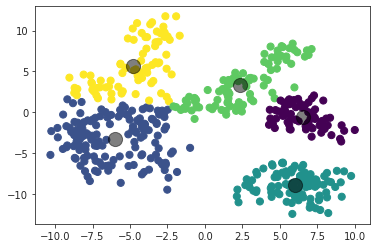

In [12]:
#Execução do algoritmo, considerando 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [13]:
#Posição dos centródides, considerando 5 clusters
kmeans.cluster_centers_

array([[ 6.54167452, -0.57833569],
       [-6.00093158, -3.22985389],
       [ 6.01305095, -8.90895584],
       [ 2.37055809,  3.33784875],
       [-4.77234911,  5.66811008]])

In [14]:
#WCSS, considerando 5 clusters
kmeans.inertia_

4717.404091931214